In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression
import numpy as np

# follows django database settings format, replace with your own settings
DATABASES = {
    'production':{
        'NAME': 'Accuracy',
        'USER': 'postgres',
        'PASSWORD': 'iamgreat',
        'HOST': 'localhost',
        'PORT': 5432,
    },
}

# choose the database to use
db = DATABASES['production']

# construct an engine connection string
engine_string = "postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}".format(
    user = db['USER'],
    password = db['PASSWORD'],
    host = db['HOST'],
    port = db['PORT'],
    database = db['NAME'],
)

# create sqlalchemy engine
engine = create_engine(engine_string)



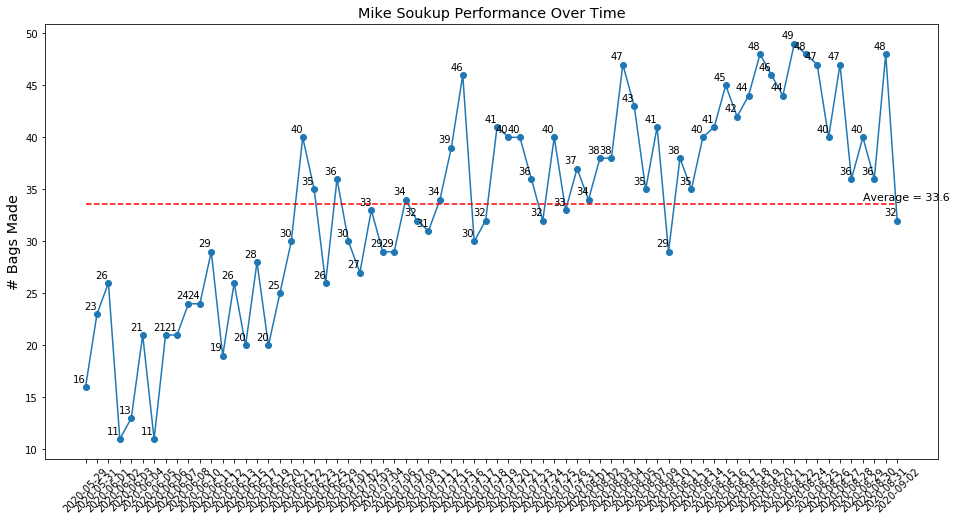

id       1.000000
Made    43.214286
dtype: float64

In [4]:
# read a table from database into pandas dataframe, replace "tablename" with your table name
df = pd.read_sql_query('''  SELECT * 
                            FROM public.daily_bags_toss
                            WHERE id = 1
                            ORDER BY "Date" ASC''',engine)

avg = round(df['Made'].mean(),1)
plt.figure(figsize = (16,8))
plt.plot(df.index,df['Made'],marker = 'o')
plt.xticks(list(df.index), labels = list(df['Date']), rotation = 45)
plt.ylabel("# Bags Made",size = 'x-large')
plt.title('{} {} Performance Over Time'.format(df['FirstName'][0],df['LastName'][0]),size = 'x-large')
plt.plot([df.index[0],df.index[-1]], [avg,avg], color = 'r',linestyle = '--')
plt.text(x = df.index[-4], y = avg*1.009, s = 'Average = {}'.format(avg), size = 11)
labels = []
for i in df['Made']:
    labels.append(str(i))
for i in range(len(df.index)):
    plt.text(x = df.index[i] , y = df['Made'][i]+.009*max(df['Made']), s = labels[i],size = 10,
            horizontalalignment = 'right', verticalalignment = 'baseline')
#plt.savefig('Mike Soukup Post4_2.png')
plt.show()

#std_dev = round(df['Made'].std(),2)
#s = df['Made'].std()

#df['Made'].tail(5).mean()

df.tail(14).mean()
#df.describe()

### Does the fact that making a bag on the previous throw impact if you will make another one?

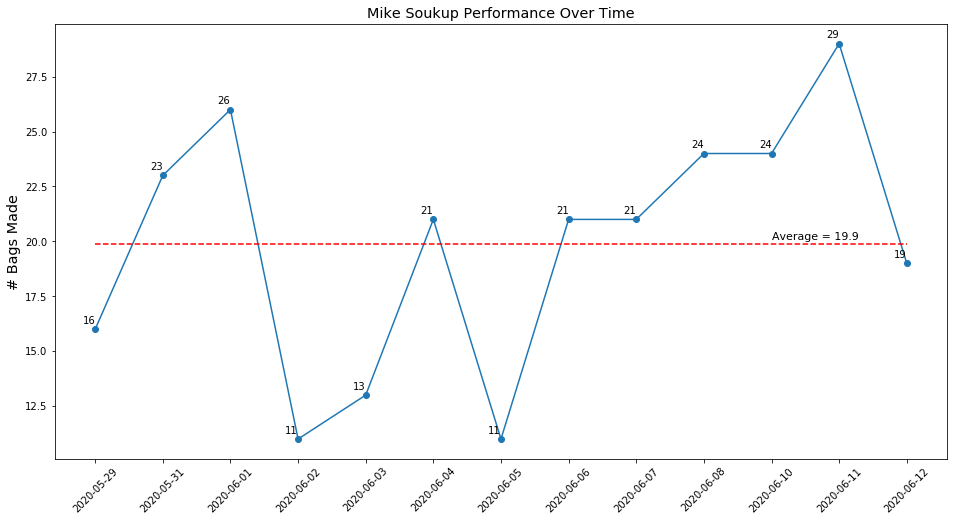

19.9
5.69


In [3]:
#Sub-setted list for posts
sub_made = list(df['Made'][0:13])
sub_index = list(df.index[0:13])
sub_dates = list(df['Date'][0:13])
sub_avg = round(df['Made'][0:13].mean(),1)

plt.figure(figsize = (16,8))
plt.plot(sub_index,sub_made,marker = 'o')
plt.xticks(sub_index, labels = sub_dates, rotation = 45)
plt.ylabel("# Bags Made",size = 'x-large')
plt.title('{} {} Performance Over Time'.format(df['FirstName'][0],df['LastName'][0]),size = 'x-large')
plt.plot([sub_index[0],sub_index[-1]], [sub_avg,sub_avg], color = 'r',linestyle = '--')
plt.text(x = sub_index[-3], y = sub_avg*1.009, s = 'Average = {}'.format(sub_avg), size = 11)
labels = []
for i in sub_made:
    labels.append(str(i))
for i in range(len(sub_index)):
    plt.text(x = sub_index[i] , y = sub_made[i]+.009*max(sub_made), s = labels[i],size = 10,
            horizontalalignment = 'right', verticalalignment = 'baseline')
#plt.savefig('MikeSoukup_Baseline.png')
plt.show()

print(round(df['Made'][0:13].mean(),1))
print(round(df['Made'][0:13].std(),2))

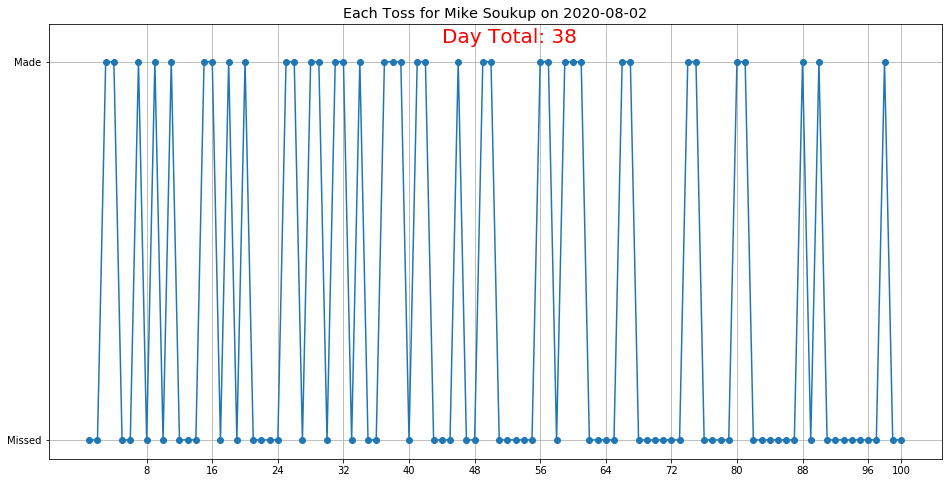

In [4]:
day = '2020-08-02'
df1 = pd.read_sql_query(''' SELECT *
                            FROM public.bag_toss_each
                            WHERE "Date" = '{}'
                            AND id = 1
                            ORDER BY "Toss_id" ASC'''.format(day),engine)
xtick_set = [8,16,24,32,40,48,56,64,72,80,88,96,100]
ytick_set = [0,1]
ytick_label = ['Missed','Made']
day_total = df1['Outcome'].sum()
plt.figure(figsize = (16,8))
plt.plot(df1['Toss_id'],df1['Outcome'],marker = 'o')
plt.title('Each Toss for {} {} on {}'.format(df1['FirstName'][0],df1['LastName'][0],day),size = 'x-large')
plt.grid()
plt.xticks(xtick_set,size = 'medium')
plt.yticks(ytick_set, ytick_label)
plt.ylim(top = 1.1)
plt.text(x = df1['Toss_id'][43] , y = 1.05, s = 'Day Total: {}'.format(day_total), size = 20, color ='r')
#plt.savefig("Streak 2020-07-7.png")
plt.show()



In [3]:
days = df['Date']
made_agg = []
streak_agg = []

for i in days:
    df11 = pd.read_sql_query(''' SELECT *
                            FROM public.bag_toss_each
                            WHERE "Date" = '{}'
                            AND id = 1
                            ORDER BY "Toss_id" ASC'''.format(i),engine)
    j = 1
    made = 0
    streak = 0
    while j < 100:
        if df11['Outcome'][j-1] == 1:
            made += 1
            #print(j , made)
            if df11['Outcome'][j] == 1:
                streak += 1
                j += 1
            else:
                j += 1
        else:
            j += 1
    if df11['Outcome'][j-1] == 1:
        made += 1
    made_agg.append(made)
    streak_agg.append(streak)
    print('Number of bags made on {} was {} and streaky bags were {}'.format(i,made,streak))

print('\n',' Total Made is {} bags'.format(sum(made_agg)),'\n',
     'Total Streaked is {}'.format(sum(streak_agg)))

Number of bags made on 2020-05-29 was 16 and streaky bags were 2
Number of bags made on 2020-05-31 was 23 and streaky bags were 7
Number of bags made on 2020-06-01 was 26 and streaky bags were 7
Number of bags made on 2020-06-02 was 11 and streaky bags were 3
Number of bags made on 2020-06-03 was 13 and streaky bags were 3
Number of bags made on 2020-06-04 was 21 and streaky bags were 5
Number of bags made on 2020-06-05 was 11 and streaky bags were 0
Number of bags made on 2020-06-06 was 21 and streaky bags were 4
Number of bags made on 2020-06-07 was 21 and streaky bags were 2
Number of bags made on 2020-06-08 was 24 and streaky bags were 7
Number of bags made on 2020-06-10 was 24 and streaky bags were 5
Number of bags made on 2020-06-11 was 29 and streaky bags were 13
Number of bags made on 2020-06-12 was 19 and streaky bags were 5
Number of bags made on 2020-06-13 was 26 and streaky bags were 5
Number of bags made on 2020-06-15 was 20 and streaky bags were 4
Number of bags made on 2

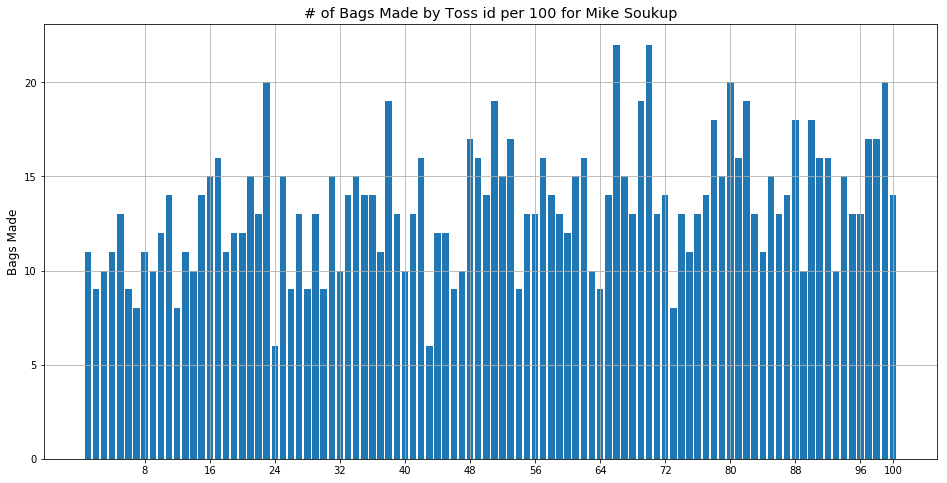

In [6]:
df2 = pd.read_sql_query(''' SELECT *
                            FROM public.bag_toss_each
                            WHERE id = 1;''',engine)
first_name = df2['FirstName'][0]
last_name = df2['LastName'][0]
df2 = df2.groupby(['Toss_id']).sum()
xtick_set = [8,16,24,32,40,48,56,64,72,80,88,96,100]
plt.figure(figsize = (16,8))
plt.bar(list(df2.index),df2['Outcome'])
plt.xticks(xtick_set,size = 'medium')
plt.grid()
plt.title('# of Bags Made by Toss id per 100 for {} {}'.format(first_name,last_name),size = 'x-large')
plt.ylabel('Bags Made',size = 'large')
#plt.savefig("Mike Soukup per 100.png")
plt.show()

Where to keep eyes when shooting?? Eyese on hole or on bag?? Seems to have a difference. A good variable. 

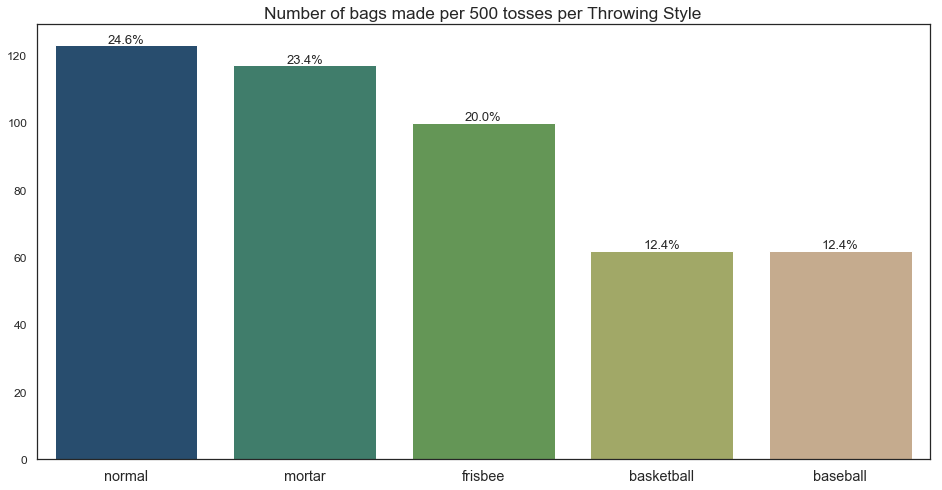

[123, 117, 100, 62, 62]


In [16]:
df3 = pd.read_sql_query(''' SELECT *
                            FROM public.throw_style_each
                            WHERE id = 1;''',engine)

toss_styles = list(df3.groupby('toss_style').indices.keys())
toss_values = list(df3.groupby('toss_style')['outcome'].sum())

toss_styles.append('normal')
toss_values.append(df[-8:-3]['Made'].sum())

toss_styles.reverse()
toss_values.reverse()

perc_made = []

for i in toss_values:
    x = round((i/500)*100,1)
    y = str(x) + '%'
    perc_made.append(y)

x_loc = [0,1,2,3,4]
plt.figure(figsize = (16,8))
sns.set(style = "white")
sns.barplot(x = toss_styles, y = toss_values, palette="gist_earth")
plt.title('Number of bags made per 500 tosses per Throwing Style', size = 'x-large')
for i in range(len(toss_styles)):
    plt.text(x = x_loc[i], y = toss_values[i]+0.005*max(toss_values), s = perc_made[i], size = 13,
            ha = 'center')
plt.yticks(size = 'medium')
plt.xticks(size = 'large', rotation = 0)
#plt.savefig('Throw Style agg.png')
plt.show()
print(toss_values)

In [12]:
df[-8:-3]

,id,FirstName,LastName,Date,Made
14,1,Mike,Soukup,2020-06-15,20
15,1,Mike,Soukup,2020-06-17,28
16,1,Mike,Soukup,2020-06-19,20
17,1,Mike,Soukup,2020-06-20,25
18,1,Mike,Soukup,2020-06-21,30


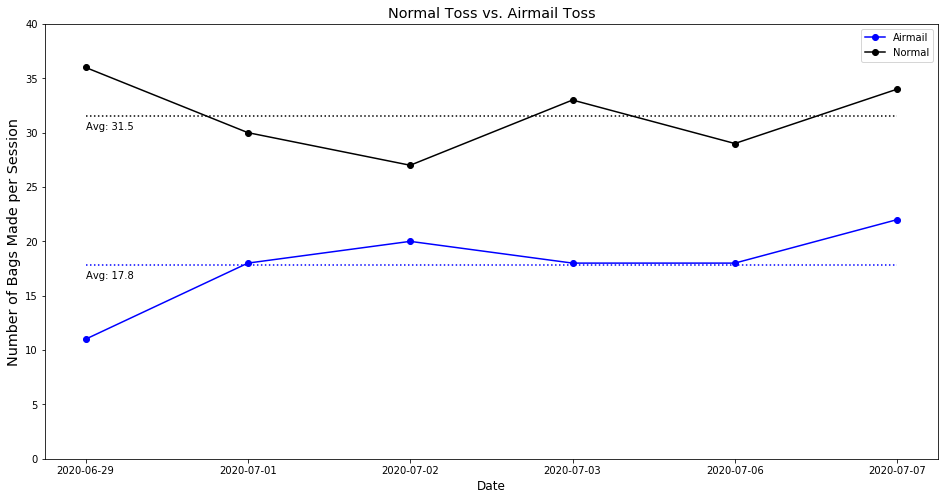

Airmail

 count     6.000000
mean     17.833333
std       3.710346
min      11.000000
25%      18.000000
50%      18.000000
75%      19.500000
max      22.000000
Name: made, dtype: float64


Normal

 count     6.000000
mean     31.500000
std       3.391165
min      27.000000
25%      29.250000
50%      31.500000
75%      33.750000
max      36.000000
Name: Made, dtype: float64


In [86]:
df4 = pd.read_sql_query(''' SELECT *
                            FROM public.throw_strategy_agg
                            WHERE id = 1;''',engine)
airmail = df4['made']
dates = df4['date']
normal_df = df[df['Date'].isin(dates)]
normal = normal_df['Made']
normal_avg = normal.mean()
airmail_avg = airmail.mean()
x = list(range(0,len(airmail)))
plt.figure(figsize = (16,8))
plt.plot(x,airmail, marker = 'o',color = "blue",label = 'Airmail')
plt.plot(x,normal, marker = 'o',color = "black",label = 'Normal')
plt.plot([x[0],x[-1]], [normal_avg,normal_avg], linestyle = "dotted", color = "black")
plt.plot([x[0],x[-1]], [airmail_avg,airmail_avg], linestyle = "dotted", color = "blue")
plt.text(x[0],normal_avg*.96,s = "Avg: {}".format(round(normal_avg,1)))
plt.text(x[0],airmail_avg*.93,s = "Avg: {}".format(round(airmail_avg,1)))
plt.xlabel("Date", size = "large")
plt.ylabel("Number of Bags Made per Session", size = "x-large")
plt.ylim(0,40)
plt.xticks(x, labels = dates)
plt.title("Normal Toss vs. Airmail Toss",size = "x-large")
plt.legend()
#plt.savefig('Mike Soukup Normal v Airmail.png')
plt.show()

print("Airmail\n\n", airmail.describe())
print("\n\nNormal\n\n", normal.describe())

In [39]:
len(airmail)

6

In [45]:
list(range(0,len(airmail)+1))

[0, 1, 2, 3, 4, 5, 6]

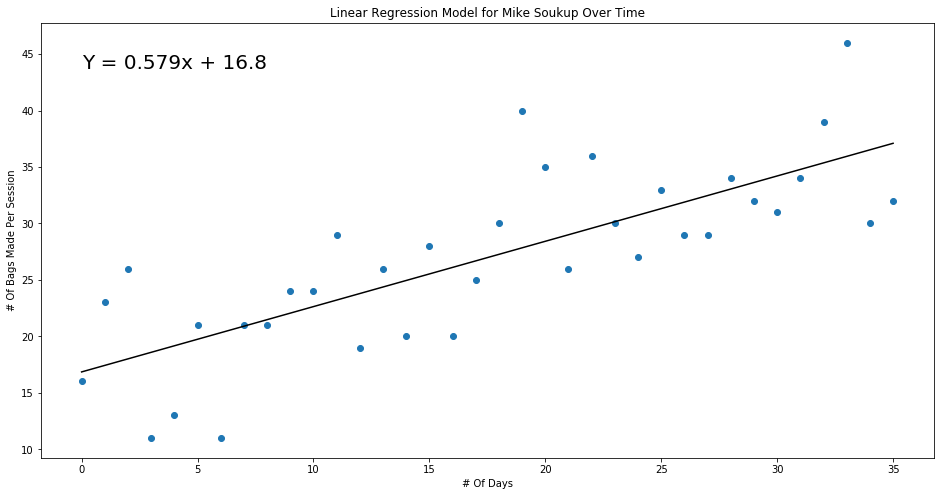

R^2 value is 0.5913


In [107]:
#####Linear Regression of data so far
# read a table from database into pandas dataframe, replace "tablename" with your table name
df = pd.read_sql_query('''  SELECT * 
                            FROM public.daily_bags_toss
                            WHERE id = 1
                            ORDER BY "Date" ASC''',engine)

start = df.index.values[0]
stop = df.index.values[-1]

plt.figure(figsize = (16,8))
x = list(df.index.values[start:stop+1])
y = list(df['Made'][start:stop+1])
plt.scatter(x,y, marker = 'o')
x_fit = df.index.values[start:stop+1].reshape(-1,1)
y_fit = df['Made'].values[start:stop+1].reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(x_fit,y_fit)
y_pred = linear_regressor.predict(x_fit)
intercept = linear_regressor.intercept_
slope = linear_regressor.coef_
plt.text(x = 0, y = max(y)*0.95, s = 'Y = {}x + {}'.format(round(float(slope),3),round(float(intercept),1)),
        fontsize = 20)
plt.title('Linear Regression Model for {} {} Over Time'.format(df['FirstName'][0],df['LastName'][0]))
plt.xlabel('# Of Days')
plt.ylabel('# Of Bags Made Per Session')
plt.plot(x,y_pred,color = 'black')
plt.show()
print('R^2 value is {}'.format(round(linear_regressor.score(x_fit,y_fit),4)))


Number of Days:  1 Slope: 7.00
Number of Days:  2 Slope: 5.00
Number of Days:  3 Slope: -1.20
Number of Days:  4 Slope: -1.80
Number of Days:  5 Slope: -0.57
Number of Days:  6 Slope: -1.14
Number of Days:  7 Slope: -0.45
Number of Days:  8 Slope: -0.10
Number of Days:  9 Slope: 0.25
Number of Days: 10 Slope: 0.43
Number of Days: 11 Slope: 0.71
Number of Days: 12 Slope: 0.52
Number of Days: 13 Slope: 0.59
Number of Days: 14 Slope: 0.47
Number of Days: 15 Slope: 0.56
Number of Days: 16 Slope: 0.45
Number of Days: 17 Slope: 0.45
Number of Days: 18 Slope: 0.53
Number of Days: 19 Slope: 0.72
Number of Days: 20 Slope: 0.78
Number of Days: 21 Slope: 0.72
Number of Days: 22 Slope: 0.77
Number of Days: 23 Slope: 0.74
Number of Days: 24 Slope: 0.68
Number of Days: 25 Slope: 0.68
Number of Days: 26 Slope: 0.64
Number of Days: 27 Slope: 0.61
Number of Days: 28 Slope: 0.61
Number of Days: 29 Slope: 0.60
Number of Days: 30 Slope: 0.58
Number of Days: 31 Slope: 0.57
Number of Days: 32 Slope: 0.59
Nu

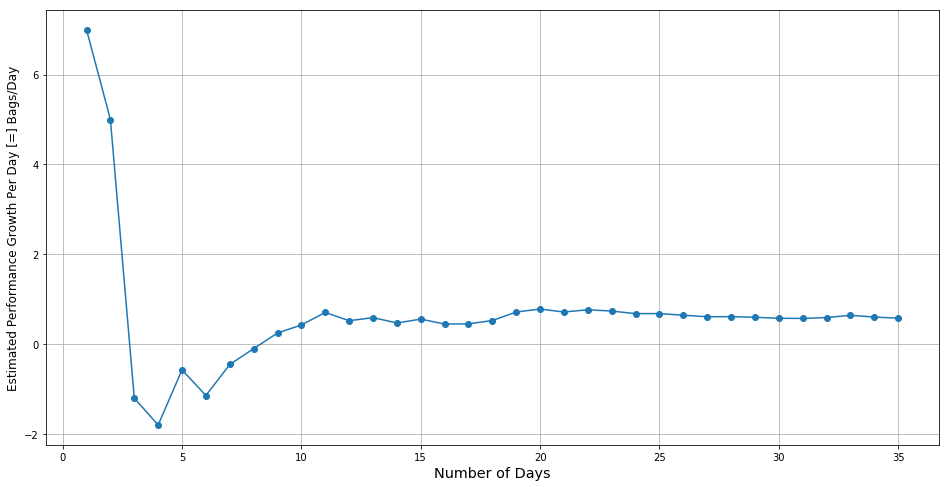

In [108]:
# read a table from database into pandas dataframe, replace "tablename" with your table name
df = pd.read_sql_query('''  SELECT * 
                            FROM public.daily_bags_toss
                            WHERE id = 1
                            ORDER BY "Date" ASC''',engine)

days = []
fit_slope = []

for i in range(1,df.index.values[-1]+1):
    start = df.index.values[0]
    stop = df.index.values[i]
    x_fit = df.index.values[start:stop+1].reshape(-1,1)
    y_fit = df['Made'].values[start:stop+1].reshape(-1,1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(x_fit,y_fit)
    intercept = linear_regressor.intercept_
    slope = linear_regressor.coef_
    days.append(stop)
    fit_slope.append(slope[0][0])
    print("Number of Days: %2d Slope: %.2f" % (stop,slope))

plt.figure(figsize = (16,8))
plt.plot(days, fit_slope, marker = 'o')
plt.xlabel('Number of Days', size = 'x-large')
plt.ylabel('Estimated Performance Growth Per Day [=] Bags/Day', size = 'large')
#plt.ylim(-2,2)
plt.grid()
plt.show()

In [112]:
def line(x,m,b):
    y = m*x + b
    return y

x = np.linspace(start = 0, stop = 50, )
x

array([0.])

In [ ]:
#####Linear Regression of data so far
# read a table from database into pandas dataframe, replace "tablename" with your table name
df = pd.read_sql_query('''  SELECT * 
                            FROM public.daily_bags_toss
                            WHERE id = 1
                            ORDER BY "Date" ASC''',engine)

start = df.index.values[0]
stop = df.index.values[-1]

plt.figure(figsize = (16,8))
x = list(df.index.values[start:stop+1])
y = list(df['Made'][start:stop+1])
plt.scatter(x,y, marker = 'o')
x_fit = df.index.values[start:stop+1].reshape(-1,1)
y_fit = df['Made'].values[start:stop+1].reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(x_fit,y_fit)
y_pred = linear_regressor.predict(x_fit)
intercept = linear_regressor.intercept_
slope = linear_regressor.coef_
plt.text(x = 0, y = max(y)*0.95, s = 'Y = {}x + {}'.format(round(float(slope),3),round(float(intercept),1)),
        fontsize = 20)
plt.title('Linear Regression Model for {} {} Over Time'.format(df['FirstName'][0],df['LastName'][0]))
plt.xlabel('# Of Days')
plt.ylabel('# Of Bags Made Per Session')
plt.plot(x,y_pred,color = 'black')
plt.show()
print('R^2 value is {}'.format(round(linear_regressor.score(x_fit,y_fit),4)))